In [34]:
import numpy as np # trabalhar com vetores, matrizes, conversões pra media, mediana
import pandas as pd # trabalhar com tabelas 
import matplotlib.pyplot as plt # fazer gráficos 


## Problema: 

- Os clientes estão fechando a conta em um banco 
- Precisamos usar os dados para saber de antemão quais estão insatisfeitos para entender e mitigar o que está acontecendo e tomar uma ação sobre essa situação. 

### Variáveis:

- Customerld: Identificador único do cliente 
- Surname: Sobrenome do cliente 
- CreditScore: Score de crédito 
- Geography: País de origem do cliente 
- Gender: Homem (Male) ou Mulher (Female)
- Age: Idade
- Tenure: Tempo de relacionamento do cliente com o banco 
- Balance: Valor na Conta Corrente 
- NumOfProducts: Quantidade de Produtos Bancários contratados pelo cliente 
- HasCrCrad: Tem cartão de crédito? (sim/não)
- IsActiveMember: Movimenta a conta frequentemente?
- EstimatedSalary: Renda estimada 

### Variável Resposta:

- Exited: Fecha conta nos próximos meses (sim/não)



In [13]:
df = pd.read_csv(r'C:\Users\vivia\OneDrive\Área de Trabalho\DATA SCIENCE\Flai Inteligencia Artificial - DS\Formação 2 - Machine Learning O Caminho do Cientista de Dados\01 - Fundamentos de Machine Learning\3ca4dfac-38a6-45f7-a32b-526d31c55792\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df = df.drop('RowNumber', axis=1) #tirar a primeira coluna pois ela não vai ser utilizada
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df = df.set_index('CustomerId') #colocando o cpf do cliente em evidência para melhor leitura dos dados
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [17]:
df.loc[15647311] # colocando o cpf do cliente em particular, ele volta apenas os dados desse cliente 

Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
Name: 15647311, dtype: object

In [21]:
df.iloc[0] # iloc pega pela posição (nome)

Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Name: 15634602, dtype: object

In [22]:
df.iloc[3] # iloc pega pela posição (nome)

Surname                Boni
CreditScore             699
Geography            France
Gender               Female
Age                      39
Tenure                    1
Balance                 0.0
NumOfProducts             2
HasCrCard                 0
IsActiveMember            0
EstimatedSalary    93826.63
Exited                    0
Name: 15701354, dtype: object

In [23]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [25]:
# transformar as variáveis textos em dummies (numeros)

df_d = pd.get_dummies(df)
df_d

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,False,...,False,False,False,False,False,True,False,False,True,False
15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,...,False,False,False,False,False,False,False,True,True,False
15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,...,False,False,False,False,False,True,False,False,True,False
15701354,699,39,1,0.00,2,0,0,93826.63,0,False,...,False,False,False,False,False,True,False,False,True,False
15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,0,False,...,False,False,False,False,False,True,False,False,False,True
15569892,516,35,10,57369.61,1,1,1,101699.77,0,False,...,False,False,False,False,False,True,False,False,False,True
15584532,709,36,7,0.00,1,0,1,42085.58,1,False,...,False,False,False,False,False,True,False,False,True,False


In [26]:
# ver as primeira 20 colunas 

df_d.iloc[:,0:20]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz
CustomerId,,,,,,,,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,False,False,False,False,False,False,False,False
15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,False,False,False,False,False,False,False,False,False
15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,False,False,False,False,False,False,False,False
15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,False,False,False,False,False,False,False,False
15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,0,False,False,False,False,False,False,False,False,False,False,False
15569892,516,35,10,57369.61,1,1,1,101699.77,0,False,False,False,False,False,False,False,False,False,False,False
15584532,709,36,7,0.00,1,0,1,42085.58,1,False,False,False,False,False,False,False,False,False,False,False


In [27]:
# Separar entre variáveis preditivas (que eu sei que eu tenho hoje: qual a conta corrente, qual os dados dele, qual a idade, etc) 
# e variáveis respostas (futuro, o que eu quero prever nos proximos 3 meses de ele possa fechar a conta dele)

X = df_d.drop('Exited', axis=1)
y = df_d.Exited


In [29]:
y

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Exited, Length: 10000, dtype: int64

### Proporções de Classe 
Quanto eu tenho de cada classe? Pessoas que fecharam a conta e pessoas que não fecharam a conta



In [30]:
y.mean() #media 

0.2037

In [31]:
y.value_counts() #contagem

Exited
0    7963
1    2037
Name: count, dtype: int64

In [33]:
#proporção: isso ajuda a classificar os dados
y.value_counts() / y.shape[0] 


Exited
0    0.7963
1    0.2037
Name: count, dtype: float64

proporção: isso ajuda a classificar os dados, onde mostra que 0 (80% não fecham a conta) 1 (20% fecham a conta)

### Separação em Treino e Teste 

In [35]:
from sklearn.model_selection import train_test_split #importar para treinar o modelo

# variavel que vai usar pra treino; variavel que vai usar pra teste
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.30, random_state=61658) # 30% vai usar pra teste e 70% pra treino



### Treinar Modelo

In [40]:
from sklearn.ensemble import RandomForestClassifier

# criar um objeto RandomForest, colocar isso dentro de uma variável ja com os parametros para treinar esse modelo, e depois 
# passar os dados para ele para de fato ele aprender 
# n_jobs: quantos núcleos de processador eu vou utilizar

rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=61658, n_jobs=-1) 
rf

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=61658)

Esse é o objetivo, ele ainda não criou as regras, ele precisa olhar os dados para ai sim criar as regras 

In [41]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=61658)

In [42]:
rf.predict_proba(X_ts)

array([[0.77830931, 0.22169069],
       [0.78143357, 0.21856643],
       [0.7644429 , 0.2355571 ],
       ...,
       [0.75750048, 0.24249952],
       [0.83725705, 0.16274295],
       [0.8296555 , 0.1703445 ]])

uma matriz de duas colunas: </br>
primeira coluna é a propensão do meu cliente não deixar o banco (variável resposta ser 0) </br>
segunda coluna é a propensão do meu cliente deixar o banco (variável resposta ser 1)


In [45]:
pd.DataFrame(rf.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']) # transformando em tabela, colocando nome nas colunas

,Propensão 0,Propensão 1
0,0.778309,0.221691
1,0.781434,0.218566
2,0.764443,0.235557
3,0.829437,0.170563
4,0.823122,0.176878
...,...,...
2995,0.811811,0.188189
2996,0.784953,0.215047
2997,0.757500,0.242500
2998,0.837257,0.162743


In [46]:
pred = rf.predict_proba(X_ts)[:,1]
pred

array([0.22169069, 0.21856643, 0.2355571 , ..., 0.24249952, 0.16274295,
       0.1703445 ])

In [47]:
from sklearn.metrics import roc_auc_score # saber se meu modelo está com bom desempenho
roc_auc_score(y_ts, pred)

0.8110854166666667

(array([ 668., 1001.,  644.,  360.,  148.,   78.,   59.,   22.,   10.,
          10.]),
 array([0.1458298 , 0.17239006, 0.19895032, 0.22551058, 0.25207085,
        0.27863111, 0.30519137, 0.33175163, 0.35831189, 0.38487215,
        0.41143242]),
 <BarContainer object of 10 artists>)

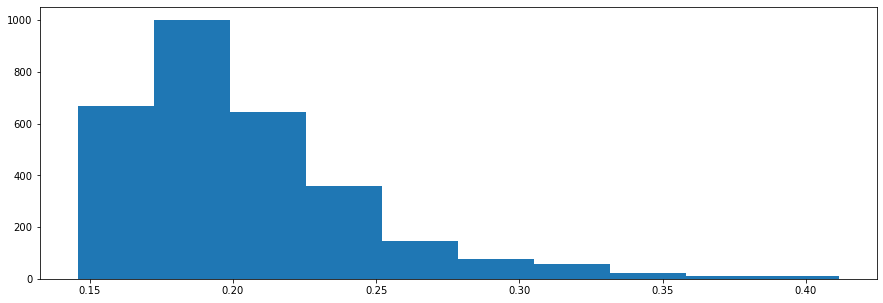

In [48]:
plt.figure(figsize=(15,5)) # delimitando a área que eu vou colocar meu gráfico 
plt.hist(pred) # histograma

(array([13.,  8., 16., 36., 31., 37., 30., 50., 38., 28., 61., 28., 36.,
        23., 28., 17.,  8., 28., 22., 12., 11.,  4.,  9.,  7.,  1.,  5.,
         3.,  2.,  5.,  3.]),
 array([0.15091574, 0.15959963, 0.16828352, 0.17696741, 0.1856513 ,
        0.19433519, 0.20301908, 0.21170297, 0.22038686, 0.22907075,
        0.23775464, 0.24643852, 0.25512241, 0.2638063 , 0.27249019,
        0.28117408, 0.28985797, 0.29854186, 0.30722575, 0.31590964,
        0.32459353, 0.33327741, 0.3419613 , 0.35064519, 0.35932908,
        0.36801297, 0.37669686, 0.38538075, 0.39406464, 0.40274853,
        0.41143242]),
 <BarContainer object of 30 artists>)

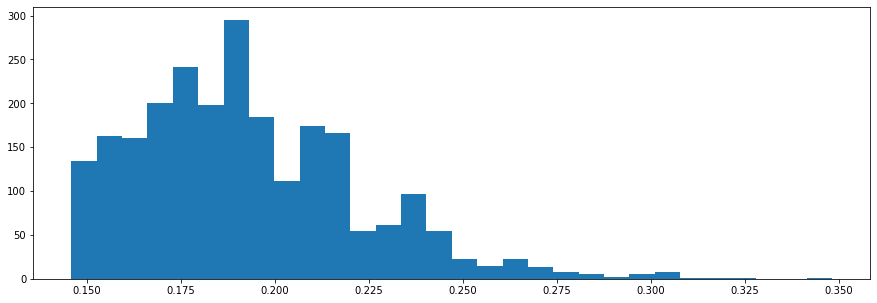

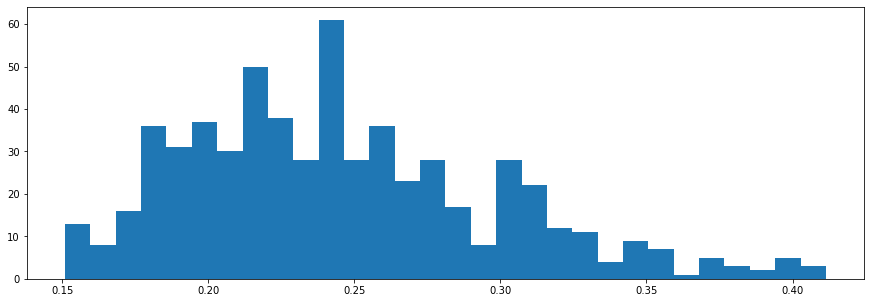

In [49]:
plt.figure(figsize=(15,5)) # delimitando a área que eu vou colocar meu gráfico 
plt.hist(pred[y_ts==0], bins=30) # score 0

plt.figure(figsize=(15,5)) # delimitando a área que eu vou colocar meu gráfico 
plt.hist(pred[y_ts==1], bins=30) # score 1

## Como comparar histogramas:

### 1) Colocar na mesma escala 


In [51]:
np.linspace(0,1,10) #lista

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

(array([0.        , 0.        , 0.        , 0.        , 1.25666667,
        6.09      , 8.12      , 5.89666667, 4.30166667, 1.74      ,
        1.015     , 0.58      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

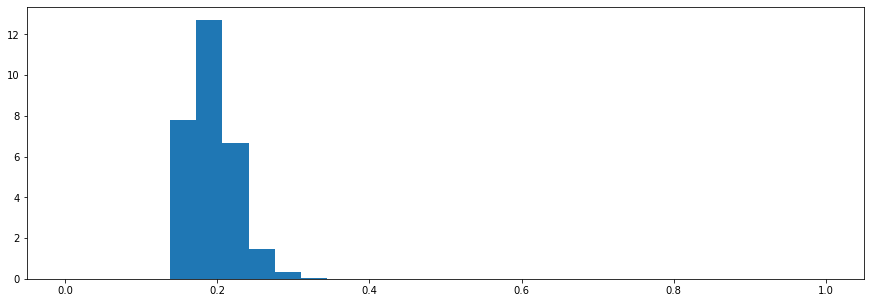

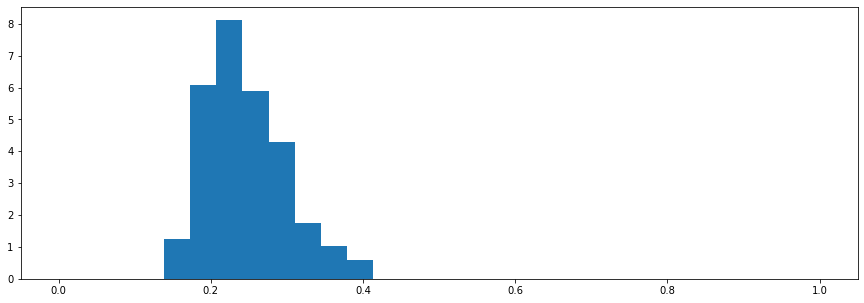

In [52]:
plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,30), density=True) 

plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,30), density=True)

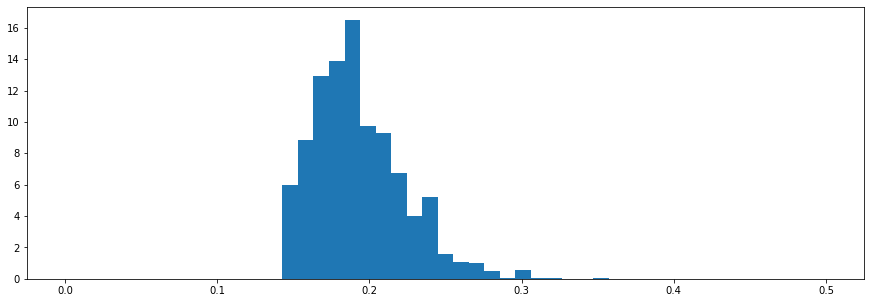

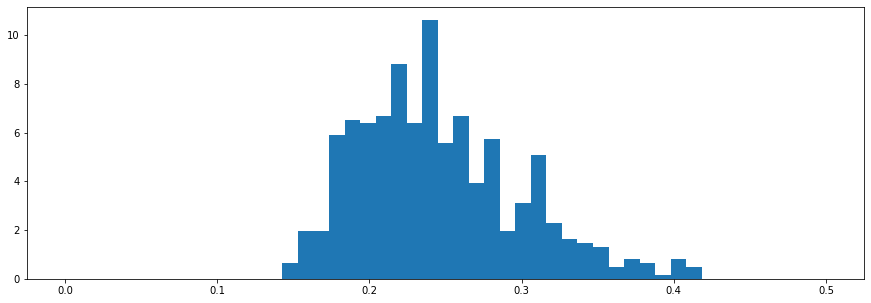

In [54]:
plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==0], bins=np.linspace(0,.5,50), density=True); 

plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==1], bins=np.linspace(0,.5,50), density=True);

### 2) Colocar no mesmo gráfico

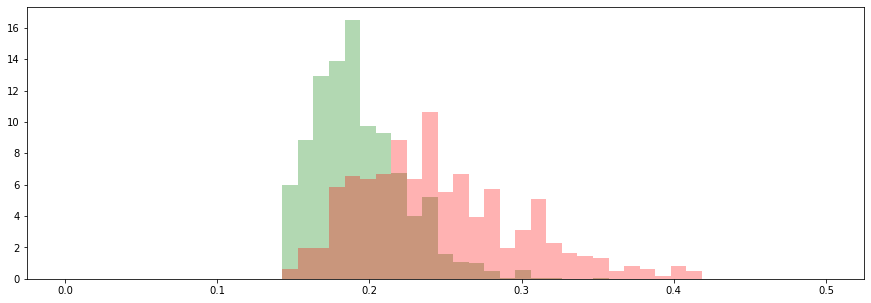

In [56]:
plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==0], bins=np.linspace(0,.5,50), density=True, color='g', alpha=.3); 
plt.hist(pred[y_ts==1], bins=np.linspace(0,.5,50), density=True, color='r', alpha=.3);

### Customizar o gráfico

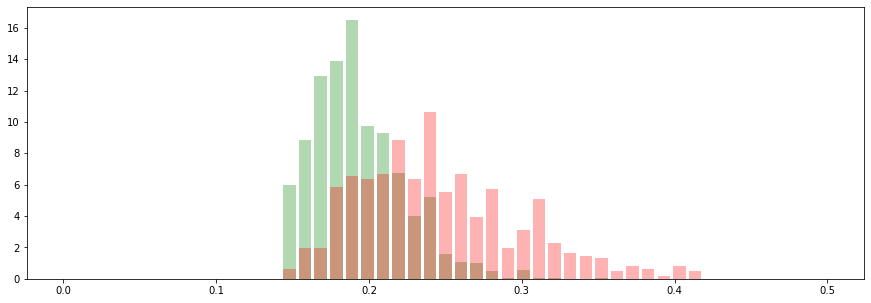

In [57]:
plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==0], bins=np.linspace(0,.5,50), density=True, color='g', alpha=.3, rwidth=.8); 
plt.hist(pred[y_ts==1], bins=np.linspace(0,.5,50), density=True, color='r', alpha=.3, rwidth=.8);

In [60]:
np.arange(0,.501,0.05) #criar uma lista para o parametro do eixo X

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

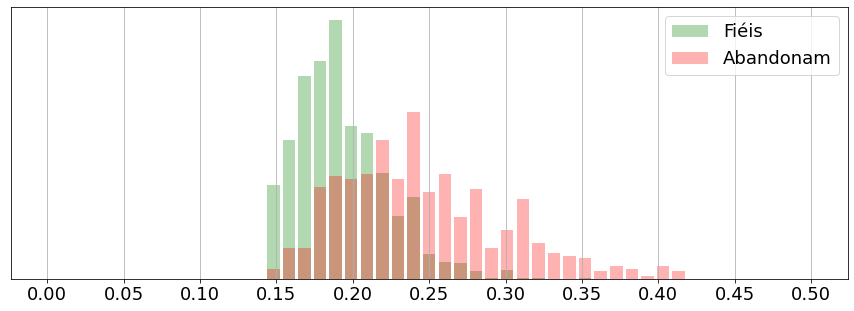

In [67]:
plt.figure(figsize=(15,5)) 
plt.hist(pred[y_ts==0], bins=np.linspace(0,.5,50), density=True, color='g', alpha=.3, rwidth=.8, label='Fiéis'); 
plt.hist(pred[y_ts==1], bins=np.linspace(0,.5,50), density=True, color='r', alpha=.3, rwidth=.8, label='Abandonam');

plt.xticks(np.arange(0,.501,0.05), fontsize=18); # customizar a fonte (tamanho)
plt.yticks([]) # fazer uma lista vazia para o eixo y e tirar ele
plt.legend(fontsize=18) # aumentar a fonte 
plt.grid()  # colocar a linha de fundo do gráfico       